## Settings

In [91]:
# modify model
model = "GWTC2_4bined_heavy_mass"

include("utils.jl")

# modify post_events
# posts = [get_post_func(event) for event in GWTC2_events_heavy_mass];
# save("backup/posts_$(model).jld2", Dict("posts" => posts))
posts = load("backup/posts_$(model).jld2", "posts");
print("Using $(length(posts)) events")

Using 44 events

In [43]:
log_p1 = -1.3997778949655402
log_p2 = -1.7132746558683978
log_p3 = -3.883333590766205
log_fpbh = -2.3301022890400653

fpbh = 10^log_fpbh 
p1, p2, p3 = 10 .^ (log_p1, log_p2, log_p3)
i = 10
j = 30
0.02 - 0.18p1 - 0.6p2 - 0.8p3

0.0011145647558475596

In [45]:
function get_p4(p1, p2, p3)
    0.02 - 0.18p1 - 0.6p2 - 0.8p3
end

get_p4 (generic function with 1 method)

In [3]:
function Pm(j, p1, p2, p3)
    if 1 <= j <= 10
        p1
    elseif 10 < j <= 40
        p2
    elseif 40 < j <= 80
        p3
    elseif 80 < j <= 130
        0.02 - 0.18p1 - 0.6p2 - 0.8p3
    else
        0
    end
end

Pm(3, 0.1, 0.2, 0.3)

0.1

## Merger rate and log_likelihood

In [22]:
function mergerRateDensity1st(i, j, p1, p2, p3, fpbh)
    
    t1 = fpbh^(53/37) * (i+j)^(36/37) / (0.485508 + 110.76p1 + 54.7495p2 + 15.237p3)^(21/37)  
    t2 = 3873.23 + 7.01778e6p1 + 1.30948e6p2 + 232650p3
    t3 = (i*j)^(34/37) * (0.00438343 + p1 + 0.494309p2 + 0.137569p3)    
    
    t1 * t2 / t3 * Pm(i, p1, p2, p3) * Pm(j, p1, p2, p3)
    
end

function mergerRateDensity2nd0(i, j, p1, p2, p3, fpbh)
#     println("$i  $j")
    denominator = i * j^(31/37)
    numerator = if 2 < i <= 11
        2p1^2 * log(i-1)
    elseif 11 < i <= 20
        2p1 * (p1 * log(10/(i-10)) + p2 * log(0.1 * (i-10) * (i-1)))
    elseif 20 < i <= 41
        p2 * (-2p2 * log(10/(i-10)) + 2p1 * log(10(i-1)/(i-10)))
    elseif 41 < i <= 50
        -2p2^2 * log(10/(i-10)) + 2p1 * p3 * log(0.025(i-40) * (i-1)) + 2p1 * p2 * log(400/(400 + (i-50)i))
    elseif 50 < i <= 80
        2(p2^2 * log(40/(i-40)) + p2 * p3 * log(0.0025(i-40) * (i-10)) + p1 * p3 * log(10(i-1)/(i-10)))
    elseif 80 < i <= 81
        p3 * (-2p3 * log(40/(i-40)) + 2p2 * log(4(i-10)/(i-40)) + 2p1 * log(10(i-1)/(i-10)))
    elseif 81 < i <= 90
        p3 * (-2p3 * log(40/(i-40)) + 2p2 * log(4(i-10)/(i-40)) + 2p1 * log(800/(800 + (i-90)i))) + p1 * (-0.04 + 0.36p1 + 1.2p2 + 1.6p3) * log(80/(80 + (i-81)i))
    elseif 90 < i <= 120
        16.1418p2 * p3 - 2p3^2 * log(40/(i-40)) - 2p2*p3 * log((i-80) * (i-40))
            + (-0.04 + 0.36p1 + 1.2p2 + 1.6p3) * (p1 * log(0.1(i-10)/(i-1)) + p2 * log(800/(800 + (i-90)i)))
    elseif 120 < i <= 130
        2p3^2 * log(80/(i-80)) 
            + (-0.04 + 0.36p1 + 1.2p2 + 1.6p3) * (
                p2 * log(0.25(i-40)/(i-10)) + p1 * log(0.1(i-10)/(i-1)) + p3 * log(3200/(3200 + (i-120)i))
                )
    else
        0
    end
    
    t1 = 4485.672695128149fpbh^(69/37) * i^(6/37) * (i+j)^(72/37)
    t2 = 0.00006325682443982787 + p1 + 0.06080232325374703p2 + 0.006400685352784427p3
    t3 = (0.4855078157817008 + 110.75968430766699p1 +54.749483582543505p2 + 15.237046396729234p3)^(5/37) 
    t4 = (0.004383434449244752 + p1 + 0.49430877240911064p2 + 0.13756852497343655p3)^2
    
    
    t1 * t2 / t3 / t4 * Pm(j, p1, p2, p3)  * numerator/denominator
    
end

mergerRateDensity2nd(i, j, p1, p2, p3, fpbh) = 0.5 * (mergerRateDensity2nd0(i, j, p1, p2, p3, fpbh) + mergerRateDensity2nd0(i, j, p1, p2, p3, fpbh)) 

mergerRateDensity(i, j, p1, p2, p3, fpbh) = mergerRateDensity1st(i, j, p1, p2, p3, fpbh) + mergerRateDensity2nd(i, j, p1, p2, p3, fpbh)


mergerRateDensity1st(i, j, p1, p2, p3, fpbh), mergerRateDensity2nd0(i, j, p1, p2, p3, fpbh), mergerRateDensity(i, j, p1, p2, p3, fpbh)

(0.00516152099164022, 4.316911031151689e-5, 0.005204690101951737)

In [23]:
mergerRateDensity2nd(82.48377133092724,  66.5, p1, p2, p3, fpbh)

1.0161469432042392e-5

In [44]:
function merger_rate_1st(p1, p2, p3, fpbh)
    int(m1, m2) = δm^2 * mergerRateDensity1st(m_min + δm*m1, m_min + δm*m2, p1, p2, p3, fpbh) 
#     println("p1=$p10, p2=$p20, p3=$p30")
    function integrand(x, f)
        f[1] = int(x[1], x[2])
    end
    result, err = cuhre(integrand, rtol=1e-3)
    0.5*result[1]
end

function merger_rate_2nd(p1, p2, p3, fpbh)
    int(m1, m2) = δm^2 * mergerRateDensity2nd(m_min + δm*m1, m_min + δm*m2, p1, p2, p3, fpbh) 
#     println("p1=$p10, p2=$p20, p3=$p30")
    function integrand(x, f)
        f[1] = int(x[1], x[2])
    end
    result, err = cuhre(integrand, rtol=1e-3)
    0.5*result[1]
end

function merger_rate(p1, p2, p3, fpbh)
    int(m1, m2) = δm^2 * mergerRateDensity(m_min + δm*m1, m_min + δm*m2, p1, p2, p3, fpbh) 
#     println("p1=$p10, p2=$p20, p3=$p30")
    function integrand(x, f)
        f[1] = int(x[1], x[2])
    end
    result, err = cuhre(integrand, rtol=1e-3)
    0.5*result[1]
end

merger_rate_1st(p1, p2, p3, fpbh), merger_rate_2nd(p1, p2, p3, fpbh), merger_rate(p1, p2, p3, fpbh)

(91.29964330160196, 3.076590172255291, 94.3769037468001)

In [25]:
# @time mergerRateDensity(i, j, mc, σc, f)
# mergerRateDensity1st(i, j, mc, σc, f)
# @time merger_rate(mc, σc, f)
# mergerRateDensity2nd(i, j, mc, σc, f)
# @time mergerRateDensity2nd(i, j, mc, σc, f)
# @time mergerRateDensity2nd1(i, j, mc, σc, f)

In [26]:
function β_func(p1, p2, p3, fpbh)
    int0(m1, m2) = mergerRateDensity(m1, m2, p1, p2, p3, fpbh) * VT(m1, m2)
    int(m1, m2) = δm^2 * int0(m_min + δm * m1, m_min + δm * m2)
    function integrand(x, f)
        f[1] = int(x[1], x[2])
    end
    result, err = cuhre(integrand, rtol=1e-1)
    0.5 * result[1]
end

β_func (generic function with 1 method)

In [27]:
@btime β_func(p1, p2, p3, fpbh)

  451.671 μs (4555 allocations: 128.31 KiB)


18.384234172113178

In [28]:
function log_pR_func(p1, p2, p3, fpbh, post)
    int0(m1, m2) = mergerRateDensity(m1, m2, p1, p2, p3, fpbh) * post(m1, m2)
    int(m1, m2) = δm^2 * int0(m_min + δm * m1, m_min + δm * m2)
    function integrand(x, f)
        f[1] = int(x[1], x[2])
    end
    result, err = cuhre(integrand, rtol=1e-1)
    log(0.5 * abs(result[1]))
end

log_pR_func (generic function with 1 method)

In [29]:
@btime log_pR_func(p1, p2, p3, fpbh, posts[8])

  2.070 ms (9626 allocations: 451.39 KiB)


-7.523787862536491

In [30]:
function logL(log_p1, log_p2, log_p3, log_fpbh, posts)
    p1, p2, p3, fpbh = 10.0 .^ (log_p1, log_p2, log_p3, log_fpbh)
    if 0.02 - 0.18p1 - 0.6p2 - 0.8p3 < 0.0
        return -1e6
    end
    result = - β_func(p1, p2, p3, fpbh) + sum(log_pR_func.(p1, p2, p3, fpbh, posts))
end

logL (generic function with 1 method)

In [31]:
@time logL(log_p1, log_p2, log_p3, log_fpbh, posts)

  0.159782 seconds (725.29 k allocations: 35.282 MiB, 5.82% gc time, 21.89% compilation time)


-532.8379739585496

In [32]:
@btime logL(log_p1, log_p2, log_p3, log_fpbh, posts)

  113.974 ms (530452 allocations: 24.21 MiB)


-532.8379739585496

In [33]:
likelihood = ps -> LogDVal(logL(ps.log_p1, ps.log_p2, ps.log_p3, ps.log_fpbh, posts))

prior = BAT.NamedTupleDist(
    log_p1 = (-2)..(1/9),
    log_p2 = (-4)..(1/30),
    log_p3 = (-6)..(1/40),
    log_fpbh = (-4)..(-0.0)
)

posterior = PosteriorDensity(likelihood, prior);

## Sampling

In [16]:
# @time begin
# println("Start sampling.")

# burnin = MCMCMultiCycleBurnin(max_ncycles=1000)
# samples, chains = bat_sample(posterior, MCMCSampling(mcalg=MetropolisHastings(), nsteps=10^5, nchains=4, burnin = burnin));
    
# println(" ")
# println("Finish sampling.")
# end

# save("backup/samples_$model.jld2", Dict("samples" => samples, "chains" => chains))

In [35]:
samples = load("backup/samples_$model.jld2")["samples"];

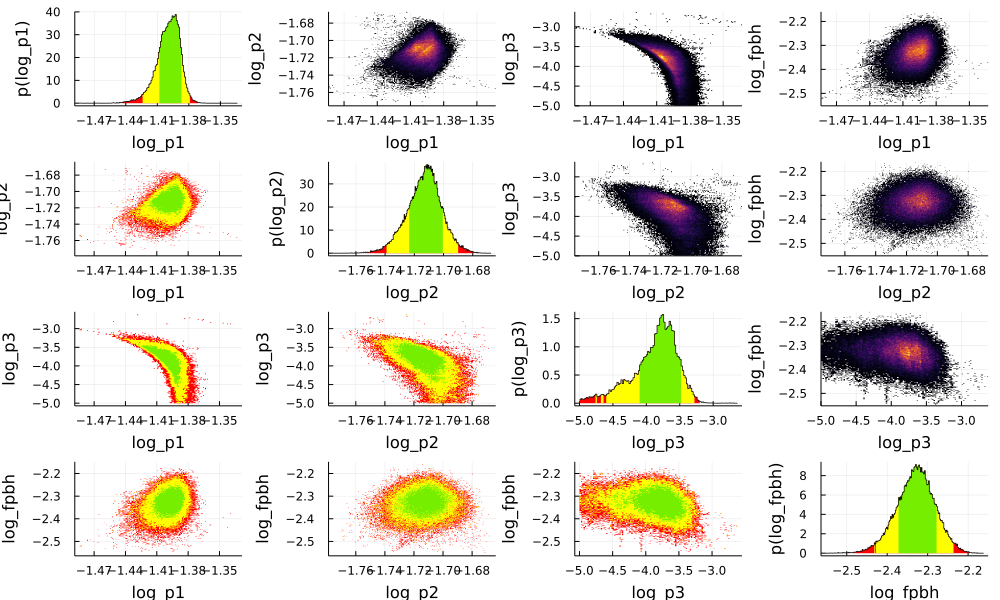

In [36]:
plot(samples)

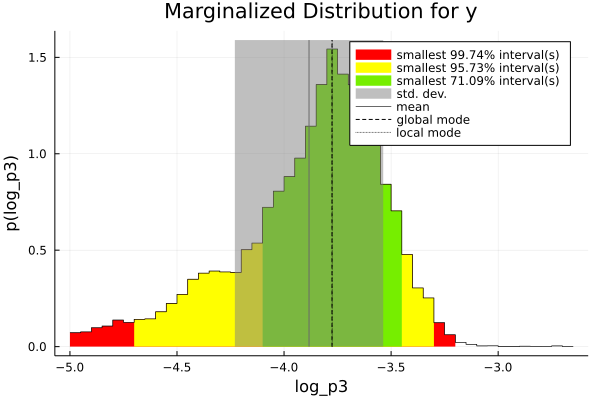

In [39]:
plot(
    samples, :log_p3,
    mean = true, std = true, globalmode = true, marginalmode = true,
    nbins = 50, title = "Marginalized Distribution for y"
)

In [40]:
sd = SampledDensity(posterior, samples)
display(sd)

BAT.jl - SampledDensity
──────────────────────────────

Sampling:
─────────────────────────
total number of samples:      127019
effective number of samples: (log_p1 = 182.25695133765183, log_p2 = 400.37042939727604, log_p3 = 147.75453557661106, log_fpbh = 1608.174414360748)


Parameter estimates:
─────────────────────────
number of free parameters: 4

NamedTuple{(:parameter, :mean, :std, :global_mode, :marginal_mode), Tuple{Symbol, Float64, Float64, Float64, Float64}}[(parameter = :log_p1, mean = -1.3997778949655402, std = 0.011258756433759629, global_mode = -1.4056764859940172, marginal_mode = -1.3925), (parameter = :log_p2, mean = -1.7132746558683978, std = 0.01187032352302378, global_mode = -1.704703412496451, marginal_mode = -1.7112500000000002), (parameter = :log_p3, mean = -3.883333590766205, std = 0.34645818934800127, global_mode = -3.7760472418678748, marginal_mode = -3.75), (parameter = :log_fpbh, mean = -2.3301022890400653, std = 0.047465178265300584, global_mode = -2.332013

In [47]:
get_post(para, samples) = [a[para] for a in samples.v]

get_post (generic function with 1 method)

In [48]:
log_p1_posts = get_post(:log_p1, samples)
log_p2_posts = get_post(:log_p2, samples)
log_p3_posts = get_post(:log_p3, samples)
log_fpbh_posts = get_post(:log_fpbh, samples)

p1_posts = 10 .^ log_p1_posts
p2_posts = 10 .^ log_p2_posts
p3_posts = 10 .^ log_p3_posts
fpbh_posts = 10 .^ log_fpbh_posts

p4_posts = get_p4.(p1_posts, p2_posts, p3_posts);
log_p4_posts = log10.(p4_posts);

In [49]:
p1_fpbh_posts = p1_posts .* fpbh_posts
p2_fpbh_posts = p2_posts .* fpbh_posts
p3_fpbh_posts = p3_posts .* fpbh_posts
p4_fpbh_posts = p4_posts .* fpbh_posts

log_p1_fpbh_posts = log10.(p1_fpbh_posts)
log_p2_fpbh_posts = log10.(p2_fpbh_posts)
log_p3_fpbh_posts = log10.(p3_fpbh_posts)
log_p4_fpbh_posts = log10.(p4_fpbh_posts);

In [50]:
R_1st_posts = zeros(length(p1_posts))
Threads.@threads for i in 1:length(R_1st_posts)
    R_1st_posts[i] = merger_rate_1st(p1_posts[i], p2_posts[i], p3_posts[i], fpbh_posts[i])
end

save("backup/R_1st_posts_$model.jld2", Dict("samples" => R_1st_posts))
R_1st_posts = load("backup/R_1st_posts_$model.jld2")["samples"];

In [51]:
R_2nd_posts = zeros(length(p1_posts))
Threads.@threads for i in 1:length(R_2nd_posts)
    R_2nd_posts[i] = merger_rate_2nd(p1_posts[i], p2_posts[i], p3_posts[i], fpbh_posts[i])
end

save("backup/R_2nd_posts_$model.jld2", Dict("samples" => R_2nd_posts))
R_2nd_posts = load("backup/R_2nd_posts_$model.jld2")["samples"];

In [52]:
R_posts = zeros(length(p1_posts))
Threads.@threads for i in 1:length(R_posts)
    R_posts[i] = merger_rate(p1_posts[i], p2_posts[i], p3_posts[i], fpbh_posts[i])
end

save("backup/R_posts_$model.jld2", Dict("samples" => R_posts))
R_posts = load("backup/R_posts_$model.jld2")["samples"];

In [55]:
get_quantile(posts) = quantile(posts, [0.05, 0.5, 0.95])

get_quantile (generic function with 1 method)

In [57]:
# function get_σ(posts)
#     x_low, x_mid, x_up = get_quantile(posts)
#     x_mid, max(x_up - x_mid, x_mid - x_low)
# end
# [1, get_σ(p1_fpbh_posts)...]

In [58]:
function get_interval(posts)
    x_low, x_mid, x_up = get_quantile(posts)
    x_mid, x_up - x_mid, x_mid - x_low
end

get_interval (generic function with 1 method)

In [59]:
get_interval(p1_posts)

(0.04006075348741405, 0.0013336503374080724, 0.0018831625143114483)

In [60]:
get_interval(p2_posts)

(0.01935453294809625, 0.0008529819627141159, 0.0009102124906632293)

In [61]:
get_interval(p3_posts)

(0.00014390592815027173, 0.00021969667476687334, 0.00011975723559282933)

In [63]:
get_interval(p4_posts)

(0.0010687332981031616, 0.0005831985908370892, 0.0005467491303033177)

In [62]:
get_interval(fpbh_posts)

(0.004677850182236639, 0.0008702667728133408, 0.0008249401364112531)

In [64]:
get_interval(R_posts)

(94.45468034554888, 26.625534486438113, 23.237615186792482)

In [66]:
function get_fpbh_from_R(p1, p2, p3, q)
    func = fpbh -> merger_rate(p1, p2, p3, fpbh) - quantile(R_posts, q)
    find_zero(func, (1e-4, 1e-2))
end

get_fpbh_from_R(p1, p2, p3, 0.05)

0.0038488382233861185

In [67]:
function plot_band(low, mid, upper, left, right)
    ms = left:0.1:right
    pm_low = [low for m in ms]
    pm_mid = [mid for m in ms]
    pm_upper = [upper for m in ms]
    
    plot!(ms, pm_mid, label="", color="blue")
    plot!(ms, pm_low, fillrange=pm_upper, fillalpha=0.35, color="cyan", label="")
end


plot_band (generic function with 1 method)

In [87]:
ps_low = [quantile(p1_fpbh_posts, 0.05), quantile(p2_fpbh_posts, 0.05), quantile(p3_fpbh_posts, 0.05), quantile(p4_fpbh_posts, 0.05)]
ps_mean = [quantile(p1_fpbh_posts, 0.5), quantile(p2_fpbh_posts, 0.5), quantile(p3_fpbh_posts, 0.5), quantile(p4_fpbh_posts, 0.5)]
ps_up = [quantile(p1_fpbh_posts, 0.95), quantile(p2_fpbh_posts, 0.95), quantile(p3_fpbh_posts, 0.95), quantile(p4_fpbh_posts, 0.95)]

4-element Vector{Float64}:
 0.00022439118898485625
 0.0001079392599723384
 1.615088801582373e-6
 7.62524973640853e-6

In [88]:
9quantile(p1_posts, 0.5), 30quantile(p2_posts, 0.5), 40quantile(p3_posts, 0.5)

(0.36054678138672647, 0.5806359884428876, 0.005756237126010869)

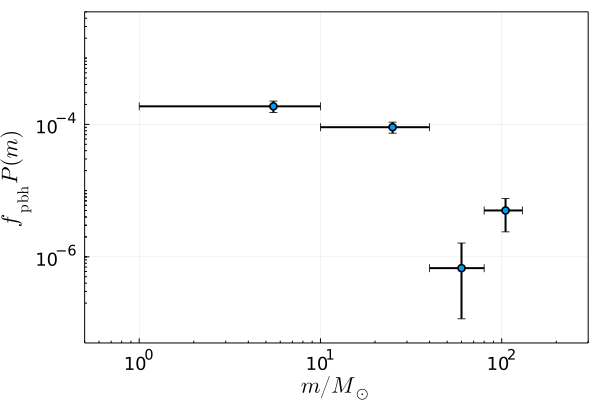

In [90]:
using Plots
using LaTeXStrings

fpbh_plot_up = 1e0
ps_left_err = ps_mean - ps_low
ps_right_err = ps_up - ps_mean;

left_points = [1, 10, 40, 80]
right_poinst = [10, 40, 80, 130]
mean_points = (left_points + right_poinst)/2
left_err = mean_points - left_points
right_err = right_poinst - mean_points

plot(mean_points, ps_mean, xerr = (left_err, right_err), yerr = (ps_left_err, ps_right_err), 
    marker = stroke(2, :black), xaxis=:log, yscale=:log10, seriestype=:scatter, size=(600, 400), 
    xlim=(5e-1, 3e2), ylim=(5e-8, 5e-3), label="", legend=:topright, framestyle=:box, minorticks=true, tickfontsize=12,guidefontsize=15)
# plot!(ms, pmqcds)
xlabel!(L"m/M_{\odot}")
ylabel!(L"f_\mathrm{pbh} P(m)")
# savefig("../latex/fpbh_Pm_post.pdf")
current()

In [48]:
# function lognormal(σ, Mc, m)
#     1/m/σ/sqrt(2pi) * exp(- log(m/Mc)^2/2/σ^2)
# end

# best_lognormal(m) = lognormal(0.58, 18.18, m)

# using Plots

# ms = [(1+5)/2, (5+10)/2, (10+40)/2, (40+80)/2, (80+130)/2]
# ps = PmQCD.(ms, 10^(-2.26092), -0.0639596)

# plot(ms, ps, xaxis=:log, yaxis=:log, color="black", legend=:bottomleft)
# plot_band(p1_fpbh_qs..., 1, 5)
# plot_band(p2_fpbh_qs..., 5, 10)
# plot_band(p3_fpbh_qs..., 10, 40)
# plot_band(p4_fpbh_qs..., 40, 80)
# plot_band(p5_fpbh_qs..., 80, 130)
# xlabel!(L"m/M_{\odot}")
# ylabel!(L"f_\mathrm{pbh} P(m)")

In [49]:
# # using StatsPlots # no need for `using Plots` as that is reexported here
# # pyplot()
# ms = [(1+5)/2 (5+10)/2 (10+40)/2 (40+80)/2 (80+130)/2]
# ps = [p1_posts, p2_posts, p3_posts, p4_posts, p5_posts]

# violin(ms[1], ps[1], leg=false, linewidth=0, xlim=[1, 130], xaxis=:log, yaxis=:log, color="red")
# # for i in 2:5
# #     violin!(ms[i], ps[i], leg=false, linewidth=0, xlim=[1, 130], xaxis=:log, yaxis=:log, color="red", widths=1e2)
# # end
# xlabel!(L"m/M_{\odot}")
# ylabel!(L"P(m)")

In [50]:
# using StatsPlots # no need for `using Plots` as that is reexported here
# pyplot()

In [51]:
function get_err(end_points)
    left_points = end_points[1:end-1]
    right_points = end_points[2:end]
    mean_points = (left_points .+ right_points) ./ 2
    left_err = mean_points - left_points
    right_err = right_points - mean_points
    mean_points, left_err, right_err
end

get_err (generic function with 1 method)

## merger rate

In [52]:
post_190521 = get_post_func("190521")
post_200115 = get_post_func("200115_042309")
post_200105 = get_post_func("200105_162426")

post_190814 = get_post_func("190814")
post_190425 = get_post_func("190425")
post_190426 = get_post_func("190426_152155")

LoadError: ArgumentError: Cannot open 'LIGO-data/masses_source_frame_posterior/GW200115_042309_posterior.txt': not a file

In [53]:
ms = 22:0.1:27
ms2 = 2.2:0.0005:2.6
# ps = post_190814.(ms2, 1.58)
ps = post_190814.(ms, 2.5)
# ps2 = post_200115.(5.7, ms)
# ps3 = post_200105.(5.7, ms)
plot(ms, ps)
# plot!(ms, ps3)

LoadError: UndefVarError: post_190814 not defined

In [54]:
thr = 7.708648380664132e-5;
function get_area(thr, post_data)
    post, m1_min, m1_max, m2_min, m2_max = post_data
    δm1 = m1_max - m1_min
    δm2 = m2_max - m2_min
    
    function post_new(m1, m2)
        p = post(m1, m2)
        p >= thr ? p : 0
    end
    int(m1, m2) = δm1 * δm2 * post_new(m1_min + δm1*m1, m2_min + δm2*m2)
    function integrand(x, f)
        f[1] = int(x[1], x[2])
    end
    result, err = cuhre(integrand, rtol=1e-3, minevals=1e4)
    result[1]
end

function get_thr(post_data)
    fzero(thr -> get_area(thr, post_data) - 0.9, 1e-5, 1e2)
end
    
function get_cond_merger_rate(p1, p2, p3, p4, fpbh, post_data, thr)
    post, m1_min, m1_max, m2_min, m2_max = post_data
    δm1 = m1_max - m1_min
    δm2 = m2_max - m2_min
#     println(δm1)
#     println(δm2)
    
    R12_new(m1, m2) = post(m1, m2) >= thr ? R12(m1, m2, p1, p2, p3, p4, fpbh) : 0
    int(m1, m2) = δm1 * δm2 * R12_new(m1_min + δm1*m1, m2_min + δm2*m2)
#     println("p1=$p10, p2=$p20, p3=$p30")
    function integrand(x, f)
        f[1] = int(x[1], x[2])
    end
    result, err = cuhre(integrand, rtol=1e-1)
    result[1]
end

# function get_cond_merger_rate2(p1, p2, p3, p4, fpbh, post_data, thr)
#     post, m1_min, m1_max, m2_min, m2_max = post_data
#     δm1 = m1_max - m1_min
#     δm2 = m2_max - m2_min
# #     println(δm1)
# #     println(δm2)
    
#     R12_new(m1, m2) = R12(m1, m2, p1, p2, p3, p4, fpbh)
#     int(m1, m2) = δm1 * δm2 * R12_new(m1_min + δm1*m1, m2_min + δm2*m2)
# #     println("p1=$p10, p2=$p20, p3=$p30")
#     function integrand(x, f)
#         f[1] = int(x[1], x[2])
#     end
#     result, err = cuhre(integrand, rtol=1e-1)
#     result[1]
# end

get_cond_merger_rate (generic function with 1 method)

In [55]:
# post_data = [post_200105, 6, 12, 1.5, 2.5];
post_data = [post_190814, 20, 30, 1, 3];
thr = get_thr(post_data)
println(thr)
println(get_area(thr, post_data))

i = 10
@time get_cond_merger_rate(p1_posts[i], p2_posts[i], p3_posts[i], p4_posts[i], fpbh_posts[i], post_data, thr)

LoadError: UndefVarError: post_190814 not defined

In [56]:
get_cond_merger_rate(p1_qs[2], p2_qs[2], p3_qs[2], p4_qs[2], fpbh_qs[2], post_data, thr)

LoadError: UndefVarError: p1_qs not defined

In [57]:
function get_R_post(post_data)
    len = length(p1_posts)
    result = zeros(len)
    thr = get_thr(post_data)
    println(thr)
    Threads.@threads for i in 1:len
#     for i in 1:len
        result[i] = get_cond_merger_rate(p1_posts[i], p2_posts[i], p3_posts[i], p4_posts[i], fpbh_posts[i], post_data, thr)
#         println(result[i])
    end
    result
end

get_R_post (generic function with 1 method)

In [58]:
@time R_post_190521 = get_R_post([post_190521, 10, 130, 10, 130]);
save("backup/$(model)_R_post_190521.jld2", Dict("posts" => R_post_190521))

R_post = load("backup/$(model)_R_post_190521.jld2")["posts"];
get_interval(R_post)

LoadError: UndefVarError: p1_posts not defined